# Singular Value Descomposition (SVD)

### Fórmula base
![](FormulaSVD.png)


### Ejemplo
![](a.png)![](u.png)![](sigma.png)![](vt.png)

- La Descomposición en Valores Singulares (SVD) toma una matriz AA y la descompone en tres matrices:
- Donde:

    - U: matriz ortogonal (columnas = vectores singulares de izquierda)
    - Σ (sigma): vector de valores singulares (representa la importancia de cada componente)
    - Vᵀ: transpuesta de una matriz ortogonal (vectores singulares de derecha)

### Lo que hace:

- Tomar una matriz original y descomponerla en 3 nuevas matrices: U, Sigma  y (Vt)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [3]:
U, sigma, VT = np.linalg.svd(A)

In [4]:
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [5]:
sigma

array([9.52551809, 0.51430058])

In [6]:
VT

array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])

## 1. Cargar el dataset

In [8]:
iris = load_iris()

In [9]:
X = iris.data

## 2. Centrar los datos

In [10]:
x_centrado = X - np.mean(X, axis=0)

## 3. Aplicar SVD

In [11]:
U, sigma, VT = np.linalg.svd(x_centrado)

In [12]:
U

array([[-1.06937444e-01, -5.31164840e-02,  8.17734010e-03, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-1.08133305e-01,  2.94357038e-02,  6.16531816e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.15099407e-01,  2.41054172e-02, -5.24368218e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.02927688e-02, -1.31144057e-02, -3.82231512e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 7.57348450e-02, -1.93954931e-02, -2.11868549e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 5.53860977e-02,  4.70071528e-02, -1.06310369e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [13]:
sigma

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [14]:
VT

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [15]:
k=2 # Vamos a tomar dos componentes principales
X_tranformado = U[:, :k] * sigma[:k] # Tranforma los datos originales a un espacio de menor dimensión, facilitando la interpretación
X_tranformado

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

## 4. Graficar

In [16]:
especies = ["setosa", "versicolor", "virginica"]

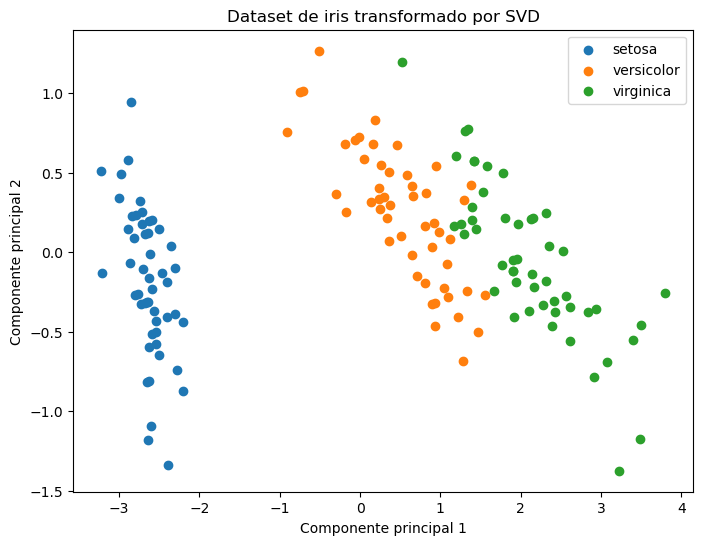

In [17]:
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(
        X_tranformado[iris.target == i, 0], 
        X_tranformado[iris.target == i, 1], 
        label=especies[i]
    )
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.title("Dataset de iris transformado por SVD")
plt.show()

- SVD es otra forma de reducir dimensiones, similar a PCA, y de hecho PCA se puede obtener a partir de SVD.
- Los valores singulares (sigma) representan la importancia de cada componente, igual que en PCA (varianza explicada).
- Visualmente útil: al reducir a 2 dimensiones, permite observar cómo se agrupan o separan las clases del dataset.
- Matemáticamente poderosa: SVD es usada no solo en análisis de datos, sino también en:
    - Compresión de imágenes
    - Reconstrucción de matrices
    - Resolución de sistemas sobredeterminados

### Ejercicios

In [18]:
import numpy as np

# Definir la matriz B
B = np.array([[1, 1, 0], [0, 1, 1], [1, 0, 1]])

u,s,vt = np.linalg.svd(B)

valores_singulares = sorted(s, reverse=True)

print(valores_singulares)


[2.0, 1.0, 0.9999999999999999]


In [19]:
import numpy as np

# Definir la matriz C
C = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 1, 1, 1]])

u,s,vt = np.linalg.svd(C)

k = 2

C_transformado = u[:, :k] * s[:k]

print(C_transformado)


[[ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  1.57009246e-16]]
